#  2020AIML544 - DEEP LEARNING - ASSIGNMENT - 1

### TASKS PERFORMED FOR QUESTION 1:

    1. IMPORT REQUIRED LIBRARIES
    2. INPUT DATA INTO AN ARRAY
    3. IMPLEMENT PERCEPTRON TRAINING RULE USING STOCHASTIC GRADIENT DESCENT APPROACH
    4. GET APPROPRIATE PARAMETERS FOR A SINGLE PERCEPTRON
    5. PLOT PERCEPTRON DECISION BOUNDARY
    6. DRAW A SCHEMATIC DIAGRAM OF TRAINED PERCEPTRON
    7. COMPARE OUR PERCEPTRON WITH INBUILT ALGORITHM & GRADIENT DESCENT APPROACH TOO
    
### TASKS PERFORMED FOR QUESTION 2:

    1. INPUT DATA INTO A DATAFRAME
    2. TRAIN TEST SPLIT THE DATA
    3. IMPLEMENT A SINGLE HIDDEN LAYER MLP 
    4. EVALUATE THE ABOVE NN1 MODEL USING ACCURACY
    5. DRAW SCHEMATIC DIAGRAM OF THE NN1 
    6. IMPLEMENT A NN2 WITH 3 HIDDEN LAYERS
    7. EVALUATE THE NN2 MODEL USING ACCURACY
    8. DRAW SCHEMATIC DIAGRAM OF THE NN2 

#### IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

### <span style='background : yellow' > **Q1.TASK 1:**</span> Implement the perceptron training rule & get the appropriate parameters for a single perceptron

In [2]:
#Input data
dataset = np.array([[-3.98,-0.12,1],    
    [-3.464,-2.11,1],   
    [-3.461,1.89,1],   
    [-2.22,-3.474,1],   
    [-2.02,0.03,0],   
    [-2.01,3.459,1],   
    [-1.42,-1.409,0],   
    [-1.416,1.419,0],   
    [-1.09,0.08,0],   
    [-0.19,-4.13,1],   
    [0.01,1.02,0],   
    [0.03,-2.12,0],   
    [0.04,2.06,0],   
    [0.06,3.97,1],   
    [0.07,0.1,0],   
    [0.12,-1.12,0],   
    [1.11,0.09,0],   
    [1.411,1.419,0],   
    [1.414,-1.415,0],   
    [1.86,3.47,1],   
    [1.96,-0.12,0],   
    [2.11,-3.472,1]])

#### Split the data into train data & test data

In [3]:
train_data = dataset[0:16]
test_data  = dataset[16:]

In [4]:
# Function to make a prediction with weights using sigmoid activation function here
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.5 else 0.0

In [5]:
# Perceptron Algorithm & estimate weights using stochastic gradient descent
def perceptron(train, l_rate, n_epoch):
    weights = [0.0 for i in range(len(train[0]))]  
    for epoch in range(0,n_epoch):
        predictions = list()
        actuals = list()
        print('epoch',epoch)
        sum_error = 0.0
        error = 0
        for row in train:
            prediction = predict(row, weights)
            expected = int(row[-1])
            predictions.append(int(prediction))
            actuals.append(expected)
            error = row[-1] - prediction
            sum_error += error**2
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return weights, predictions, actuals

In [6]:
# Perceptron Algorithm With Stochastic Gradient Descent
def prediction(train):
    predictions = list()
    actuals = list()
    for row in train:
        expected = row[-1]
        prediction = predict(row, weights_rounded)
        predictions.append(int(prediction))
        actuals.append(expected)
    return(predictions,actuals)

#### Training the perceptron with train data

In [7]:
weights, p, a = perceptron(train_data,l_rate=0.01,n_epoch=5)
weights_rounded = [round(num, 4) for num in weights]
print('weights',weights_rounded)
print('predictions',p,a)

epoch 0
>epoch=0, lrate=0.010, error=7.000
epoch 1
>epoch=1, lrate=0.010, error=4.000
epoch 2
>epoch=2, lrate=0.010, error=4.000
epoch 3
>epoch=3, lrate=0.010, error=5.000
epoch 4
>epoch=4, lrate=0.010, error=3.000
weights [0.17, -0.202, 0.0218]
predictions [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]


#### Check the test data accuracy on the trained perceptron

In [8]:
p,a=prediction(test_data)

print('Accuracy for test data :', format(accuracy_score(a, p),".2f"))
for i in range(len(test_data)):
    print("Expected=%d, Predicted=%d" % (a[i], p[i]))

Accuracy for test data : 0.67
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=0


### <span style='background : yellow' > **Q1.TASK 2:**</span> Plot the data points and the obtained decision boundary

In [9]:
df = pd.DataFrame(dataset, columns=['X0', 'X1', 'Y']) 
X = np.array(df[['X0','X1']])
Y = np.array(df[['Y']])

In [10]:
def plot_data(inputs,targets,weights):
    # fig config
    plt.figure(figsize=(10,10))
    plt.grid(True)

    #plot input samples(2D data points) and i have two classes. 
    #one is 1 and second one is 0, so it red color for 1 and blue color for 0
    for input,target in zip(inputs,targets):
        plt.plot(input[0],input[1],'ro' if (target == 1.0) else 'bo')

    # Here i am calculating slope and intercept with given three weights
    for i in np.linspace(np.amin(inputs[:,:1]),np.amax(inputs[:,:1])):
        slope = -(weights[0]/weights[2])/(weights[0]/weights[1])  
        intercept = -weights[0]/weights[2]

        #y =mx+c, m is slope and c is intercept
        y = (slope*i) + intercept
        plt.plot(i, y,'go--', linewidth=2, markersize=2)

[0.17, -0.202, 0.0218]


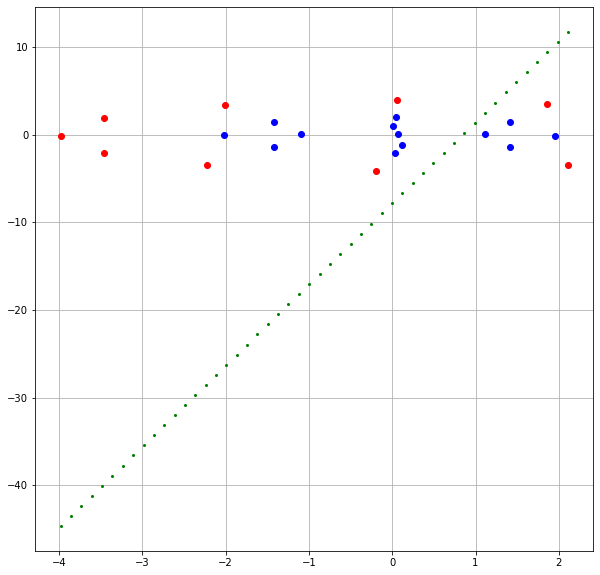

In [11]:
print(weights_rounded)
plot_data(X,Y,weights_rounded)

#### Function attained using our Perceptron Y = 0.17 - 0.202 * X1 + 0.0218 * X2

### <span style='background : yellow' > **Q1.TASK 3:**</span> Draw the schematic diagram of the trained perceptron with learned weights

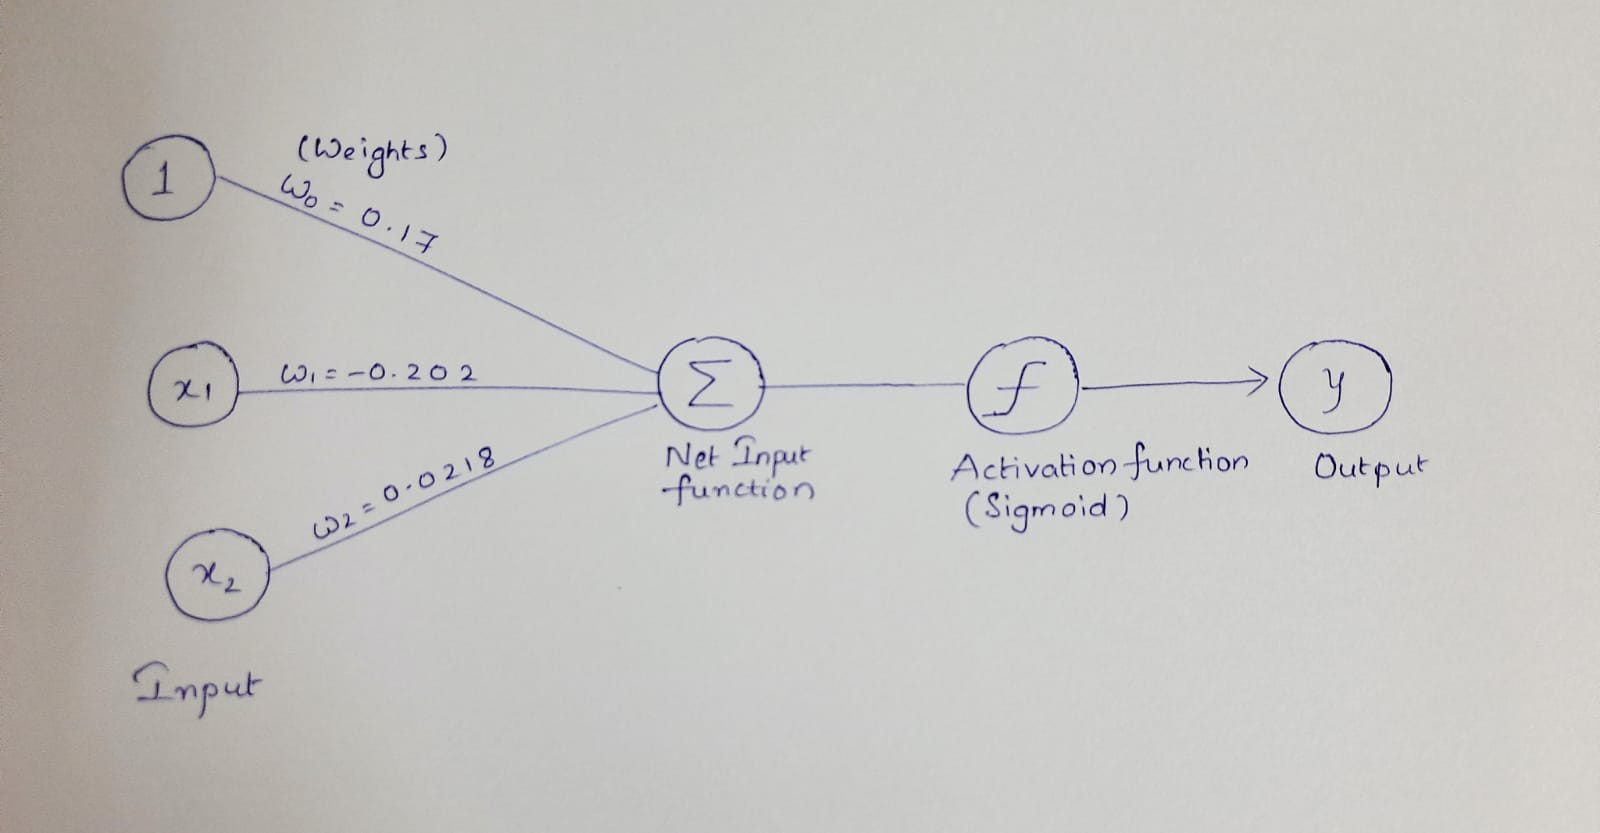

In [12]:
df = pd.DataFrame(dataset, columns=['X0', 'X1', 'Y']) 
X = df[['X0','X1']]
y = df[['Y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30,stratify = y)

#### Using Perceptron sklearn Algorithm

In [13]:
from sklearn.linear_model import Perceptron
perc = Perceptron(max_iter=5)

perc.fit(X_train, y_train)

perc.predict(X_test)

print('Perceptron Accuray score for train data :', format(perc.score(X_train,y_train),'.2f'))
print('Perceptron Accuray score for test data  :', format(perc.score(X_test,y_test),'.2f'))

Perceptron Accuray score for train data : 0.69
Perceptron Accuray score for test data  : 0.67


#### Using Gradient Descent Approach

In [14]:
#Y=w0+w1X1+w2X2
def compute_error(X0, X1, Y, start_vector):
    y_pred = start_vector[0]+start_vector[1]*X0+start_vector[2]*X1
    y_error = Y - y_pred
    sse = np.sum(np.square(y_error))
    sse1 = np.mean(sse)
    return sse1

def stepGradient(start_vector, X0, X1, Y, learningRate):
    w0_gradient = 0
    w1_gradient = 0 
    w2_gradient = 0
    
    error = compute_error(X0,X1, Y,start_vector)
    
    w0_gradient = np.mean((start_vector[0]+(start_vector[1]*X0)+(start_vector[2]*X1))-Y)
    w1_gradient = np.mean(((start_vector[0]+(start_vector[1]*X0)+(start_vector[2]*X1))-Y)*X0)
    w2_gradient = np.mean(((start_vector[0]+(start_vector[1]*X0)+(start_vector[2]*X1))-Y)*X1)
     
    new_w0 = start_vector[0] - (learningRate * w0_gradient) 
    new_w1 = start_vector[1] - (learningRate * w1_gradient) 
    new_w2 = start_vector[2] - (learningRate * w2_gradient)
    
    return [new_w0, new_w1, new_w2, error]

def gradient_descent(X0, X1, Y, start_vector, learning_rate, num_iteartions):
    cost = np.empty(num_iterations, dtype=float)
    for i in range(num_iterations):
        [w0,w1,w2,error] = stepGradient(start_vector, X0, X1, Y, learning_rate)
        start_vector = [w0,w1,w2]
        cost[i] = error
        j = i
        if (i !=0 and cost[i] > cost[i-1]):
            j = i
            i = num_iterations
            break
        print('error',cost[i])
    return [w0,w1,w2,cost,j] 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify = y)

w0 = 0
w1 = 0 
w2 = 0  
j = 0

learning_rate = 0.01
num_iterations = 2500
X0 = X_train['X0']
X1 = X_train['X1']
Y  = y_train['Y']

cost = np.empty(num_iterations, dtype=float)
j = 0
[w0, w1, w2, cost, j] = gradient_descent(X0 ,X1, Y, [w0, w1, w2], learning_rate, num_iterations)
num_iterations = j

print("After {0} iterations w0 = {1}, w1 = {2}, w2 = {3}, error = {4}, learning_rate = {5}".format(num_iterations, w0, w1, w2,
                            compute_error(X0,X1, Y, [w0, w1, w2]),learning_rate))
error = compute_error(X0,X1, Y, [w0, w1, w2])

error 7.0
error 6.6545921064344045
error 6.337716183270151
error 6.046978689805302
error 5.78018757847356
error 5.53533530618525
error 5.310583280001664
error 5.104247615866802
error 4.9147860993912476
error 4.7407862470822515
error 4.580954375016152
error 4.43410558982178
error 4.299154624048443
error 4.17510744458622
error 4.061053568841491
error 3.9561590288943247
error 3.859659928920024
error 3.77085654578444
error 3.6891079269580622
error 3.613826943770587
error 3.5444757615760336
error 3.4805616916465096
error 3.4216333925857465
error 3.367277391774959
error 3.31711489985471
error 3.270798893526805
error 3.2280114440476955
error 3.1884612706957602
error 3.151881500244083
error 3.118027615071749
error 3.0866755740126344
error 3.0576200913827236
error 3.0306730608556247
error 3.0056621119807394
error 2.982429288168311
error 2.9608298359083305
error 2.9407310958533937
error 2.9220114871858645
error 2.9045595774131323
error 2.8882732303972163
error 2.873058826031402
error 2.858830545

In [16]:
weights = [w0, w1, w2]

X_test1 = np.array(pd.concat((X_test,y_test),axis=1, ignore_index=True))

p,a = prediction(X_test1)

weights_rounded = [round(num, 4) for num in weights]
print('weights',weights_rounded)
print('predictions',p,a)
print('Accuracy is :', format(accuracy_score(a, p),".2f"))

weights [0.273, -0.1725, 0.0093]
predictions [0, 0, 0, 0, 0, 0] [0.0, 0.0, 1.0, 0.0, 0.0, 1.0]
Accuracy is : 0.67


#### <span style='background : yellow' > **Observation**</span>  Just tried to compare our Perceptron built using stochastic gradient descent approach with inbuilt Perceptron library & gradient descent approach. Attained almost the same accuracy in all approaches since the data is not linearly separable. We can resolve this by trying non-linear approach.

### <span style='background : yellow' > **Q2:**</span> Design a neural network neural network to classify flowers from Iris dataset.

#### Read the input excel file into a dataframe

In [17]:
# load the dataset
df = pd.read_csv("C:\\Users\Aspire V3-572\Desktop\AIML Mini Project\iris.data", sep=",", header=None)
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

#### Display information about the dataframe using head function

In [18]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
df.shape

(150, 5)

There are 150 records in the dataset.

#### Convert categorical output to numerical for classification purpose

In [20]:
df['class'].replace('Iris-setosa', '0', inplace= True)
df['class'].replace('Iris-versicolor', '1', inplace= True)
df['class'].replace('Iris-virginica', '2', inplace= True)

df['class'] = pd.to_numeric(df['class'])
df.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class             int64
dtype: object

In [21]:
# split into input (X) and output (y) variables
X = df[['sepal length','sepal width','petal length','petal width']]
y = df[['class']]

In [22]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0,stratify=y)

### <span style='background : yellow' > **Q2: TASK 1**</span> Implement a single hidden layer MLP. The final output layer will have 3 neurons, one for each result.

In [23]:
# define the keras model
NN1 = Sequential()
NN1.add(Dense(8, input_dim=4, activation='relu'))
NN1.add(Dense(3, activation='softmax'))

# compile the keras model
NN1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the training dataset
NN1.fit(X_train, y_train, epochs=150, batch_size=16)

Epoch 1/150
8/8 [==============================] - 0s 4ms/step - loss: 2.1292 - accuracy: 0.3333
Epoch 2/150
8/8 [==============================] - 0s 2ms/step - loss: 2.0489 - accuracy: 0.3333
Epoch 3/150
8/8 [==============================] - 0s 3ms/step - loss: 1.9697 - accuracy: 0.3333
Epoch 4/150
8/8 [==============================] - 0s 3ms/step - loss: 1.9017 - accuracy: 0.3333
Epoch 5/150
8/8 [==============================] - 0s 3ms/step - loss: 1.8317 - accuracy: 0.3333
Epoch 6/150
8/8 [==============================] - 0s 2ms/step - loss: 1.7619 - accuracy: 0.3333
Epoch 7/150
8/8 [==============================] - 0s 3ms/step - loss: 1.7041 - accuracy: 0.3333
Epoch 8/150
8/8 [==============================] - 0s 3ms/step - loss: 1.6507 - accuracy: 0.3333
Epoch 9/150
8/8 [==============================] - 0s 3ms/step - loss: 1.5975 - accuracy: 0.3333
Epoch 10/150
8/8 [==============================] - 0s 3ms/step - loss: 1.5456 - accuracy: 0.3333
Epoch 11/150
8/8 [===========

    The model expects rows of data with 4 variables (the input_dim=4 argument)
    The hidden layer has 8 nodes and uses the relu activation function.
    The output layer has one node and uses the sigmoid activation function.

In [24]:
# evaluate the keras model
loss, accuracy = NN1.evaluate(X_train, y_train)
print('Accuracy on training data:',format(accuracy,'.2f'))
print('Loss on training data    :',format(loss,'.2f'))

4/4 [==============================] - 0s 2ms/step - loss: 0.2888 - accuracy: 0.9667
Accuracy on training data: 0.97
Loss on training data    : 0.29


In [25]:
# make probability predictions with the model
predictions = (NN1.predict(X_test) > 0.5).astype(int)
for i in range(0,5):
    print(predictions[i], y_test.iloc[i])
    
p = pd.DataFrame(predictions,columns=[0,1,2])
p1 = p.idxmax(axis=1)
for i in range(0,len(y_test)):
    print('%s => %d (expected %d)' % (X_test.iloc[i].tolist(), p1.iloc[i], y_test.iloc[i]))

[1 0 0] class    0
Name: 36, dtype: int64
[0 1 0] class    1
Name: 55, dtype: int64
[1 0 0] class    0
Name: 44, dtype: int64
[0 0 1] class    2
Name: 134, dtype: int64
[1 0 0] class    0
Name: 39, dtype: int64
[5.5, 3.5, 1.3, 0.2] => 0 (expected 0)
[5.7, 2.8, 4.5, 1.3] => 1 (expected 1)
[5.1, 3.8, 1.9, 0.4] => 0 (expected 0)
[6.1, 2.6, 5.6, 1.4] => 2 (expected 2)
[5.1, 3.4, 1.5, 0.2] => 0 (expected 0)
[5.5, 2.6, 4.4, 1.2] => 1 (expected 1)
[6.5, 3.0, 5.2, 2.0] => 2 (expected 2)
[4.6, 3.2, 1.4, 0.2] => 0 (expected 0)
[4.6, 3.1, 1.5, 0.2] => 0 (expected 0)
[5.5, 2.4, 3.7, 1.0] => 1 (expected 1)
[6.3, 3.4, 5.6, 2.4] => 2 (expected 2)
[5.6, 3.0, 4.1, 1.3] => 1 (expected 1)
[6.5, 2.8, 4.6, 1.5] => 1 (expected 1)
[6.9, 3.1, 5.4, 2.1] => 2 (expected 2)
[5.8, 2.7, 4.1, 1.0] => 1 (expected 1)
[5.8, 2.7, 5.1, 1.9] => 2 (expected 2)
[5.7, 2.5, 5.0, 2.0] => 2 (expected 2)
[6.7, 3.1, 4.4, 1.4] => 1 (expected 1)
[7.0, 3.2, 4.7, 1.4] => 1 (expected 1)
[5.1, 3.8, 1.6, 0.2] => 0 (expected 0)
[5.1, 3.8

In [26]:
testloss, testaccuracy = NN1.evaluate(X_test, y_test)
print('Accuracy on test data:',format(testaccuracy,'.2f'))
print('Loss on test data    :',format(testloss,'.2f'))

1/1 [==============================] - 0s 53ms/step - loss: 0.2726 - accuracy: 1.0000
Accuracy on test data: 1.00
Loss on test data    : 0.27


In [27]:
weights = [layer.get_weights() for layer in NN1.layers]
print(weights)

[[array([[-0.4439609 , -0.01290202, -0.4344546 ,  0.8623483 , -0.35890335,
        -0.6060531 ,  0.5269925 ,  0.20998138],
       [ 0.32463425, -0.45189092,  0.09527886,  0.00832962, -0.6168437 ,
         0.22416997, -0.42993012,  0.88935035],
       [-0.14385295, -0.31227374,  0.08140749, -1.1372622 , -0.60548633,
        -0.5180765 ,  0.40474582, -0.3142033 ],
       [-0.6901792 ,  0.34712332, -0.10553706, -0.7098462 , -0.6819306 ,
         0.50808746,  0.22456786, -1.2344514 ]], dtype=float32), array([ 0.        ,  0.        ,  0.        ,  0.42432594,  0.        ,
        0.        , -0.19578776,  0.5547543 ], dtype=float32)], [array([[ 0.02746922, -0.05225623,  0.12578845],
       [ 0.16227227,  0.65291554,  0.2613712 ],
       [ 0.45341295, -0.16141355,  0.67047304],
       [ 0.5120392 , -1.2047484 , -1.196677  ],
       [-0.03845334, -0.01181769, -0.57725656],
       [ 0.5357794 ,  0.01147342, -0.36345702],
       [-0.69885176, -0.21229094,  0.25554588],
       [ 0.30444667,  0.

### Schematic Diagram of the Neural Network with 1 hidden layer

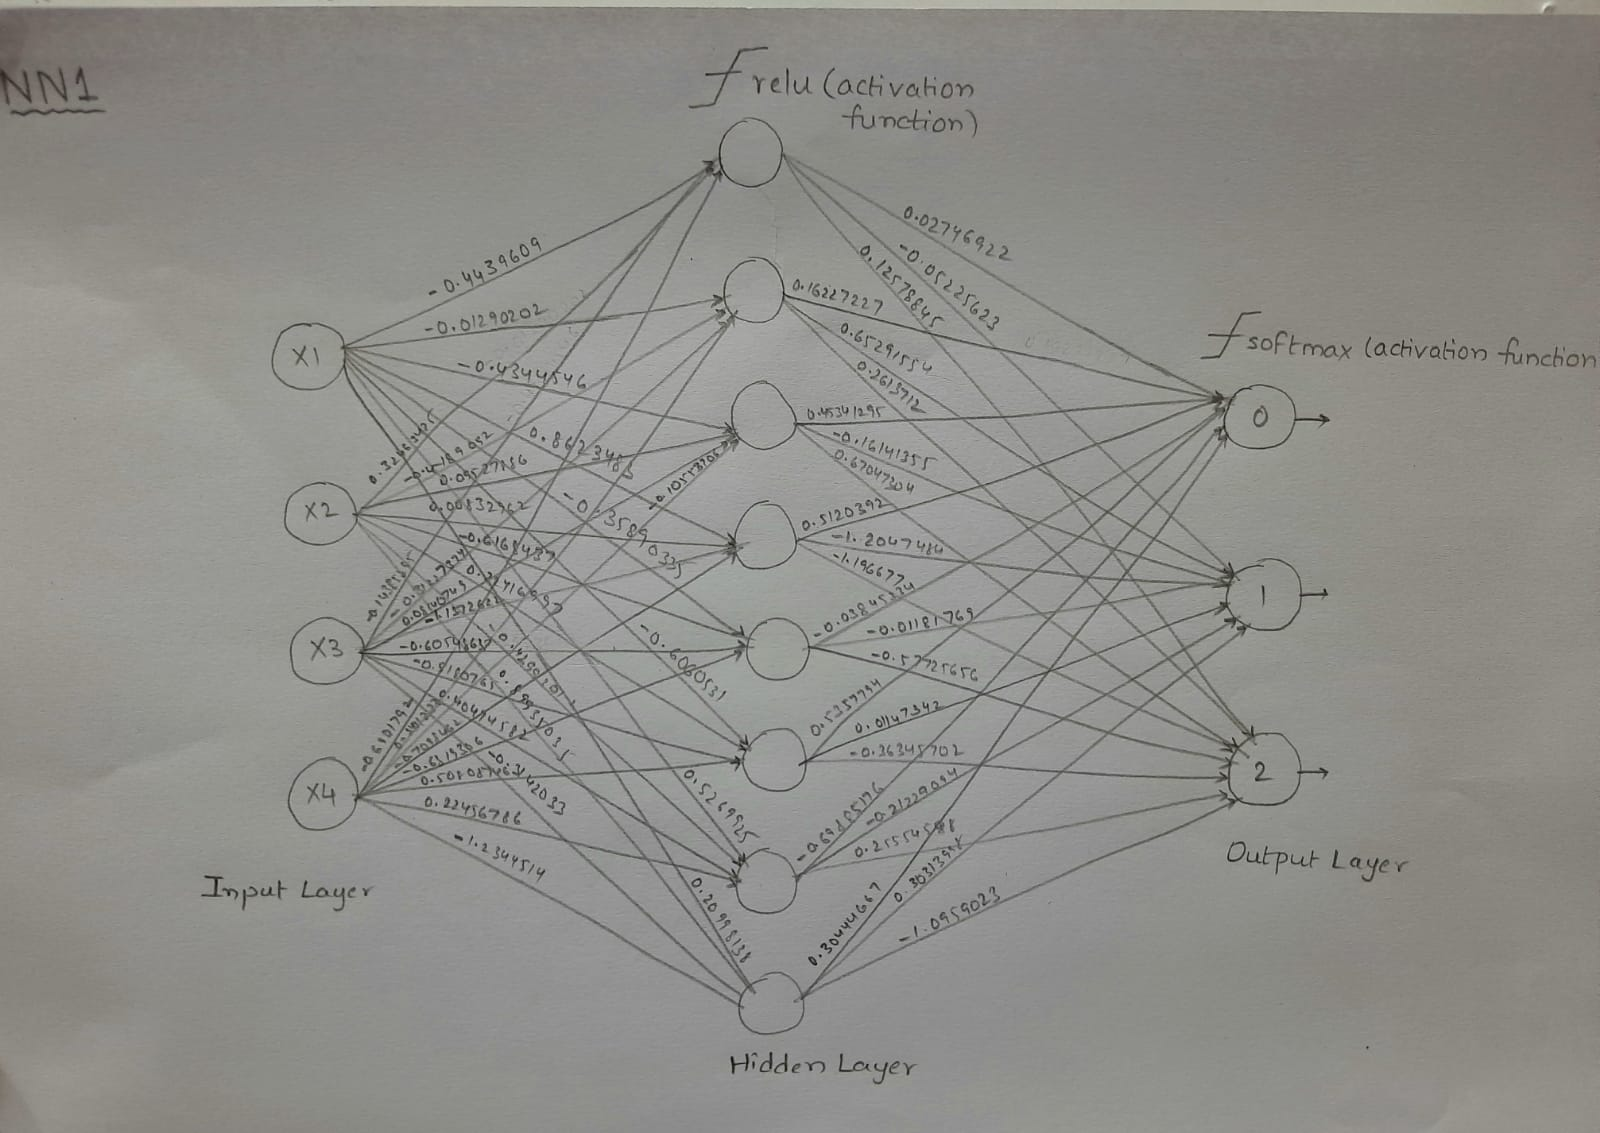

### <span style='background : yellow' > **Q2:TASK 2**</span> Now use a NN with two hidden layers. The first hidden layer has 8 neurons. The second hidden layer has 4 neurons. The third hidden layer has 4 neurons. 

In [28]:
# define the keras model
NN2 = Sequential()
NN2.add(Dense(8, input_dim=4, activation='relu'))
NN2.add(Dense(4, activation='relu'))
NN2.add(Dense(4, activation='relu'))
NN2.add(Dense(3, activation='softmax'))

# compile the keras model
NN2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the training dataset
NN2.fit(X_train, y_train, epochs=200, batch_size=16)

Epoch 1/200
8/8 [==============================] - 0s 2ms/step - loss: 2.7625 - accuracy: 0.3333
Epoch 2/200
8/8 [==============================] - 0s 3ms/step - loss: 2.4524 - accuracy: 0.3333
Epoch 3/200
8/8 [==============================] - 0s 3ms/step - loss: 2.1922 - accuracy: 0.3333
Epoch 4/200
8/8 [==============================] - 0s 3ms/step - loss: 1.9587 - accuracy: 0.3333
Epoch 5/200
8/8 [==============================] - 0s 3ms/step - loss: 1.7698 - accuracy: 0.3333
Epoch 6/200
8/8 [==============================] - 0s 3ms/step - loss: 1.6173 - accuracy: 0.3333
Epoch 7/200
8/8 [==============================] - 0s 4ms/step - loss: 1.4954 - accuracy: 0.3333
Epoch 8/200
8/8 [==============================] - ETA: 0s - loss: 1.4720 - accuracy: 0.31 - 0s 3ms/step - loss: 1.4010 - accuracy: 0.3333
Epoch 9/200
8/8 [==============================] - 0s 3ms/step - loss: 1.3220 - accuracy: 0.3333
Epoch 10/200
8/8 [==============================] - 0s 3ms/step - loss: 1.2623 - accu

    The model expects rows of data with 4 variables (the input_dim=4 argument)
    The first hidden layer has 8 nodes and uses the relu activation function.
    The second hidden layer has 4 nodes and uses the relu activation function.
    The third hidden layer has 4 nodes and uses the relu activation function.
    The output layer has one node and uses the softmax activation function.

In [29]:
# evaluate the keras model
loss, accuracy = NN2.evaluate(X_train, y_train)
print('Accuracy on training data:',format(accuracy,'.2f'))
print('Loss on training data    :',format(loss,'.2f'))

4/4 [==============================] - 0s 3ms/step - loss: 0.1369 - accuracy: 0.9750
Accuracy on training data: 0.98
Loss on training data    : 0.14


In [30]:
# make probability predictions with the model
predictions = (NN2.predict(X_test) > 0.5).astype(int)
for i in range(0,5):
    print(predictions[i], y_test.iloc[i])
    
p = pd.DataFrame(predictions,columns=[0,1,2])
p1 = p.idxmax(axis=1)
for i in range(0,len(y_test)):
    print('%s => %d (expected %d)' % (X_test.iloc[i].tolist(), p1.iloc[i], y_test.iloc[i]))

[1 0 0] class    0
Name: 36, dtype: int64
[0 1 0] class    1
Name: 55, dtype: int64
[1 0 0] class    0
Name: 44, dtype: int64
[0 0 1] class    2
Name: 134, dtype: int64
[1 0 0] class    0
Name: 39, dtype: int64
[5.5, 3.5, 1.3, 0.2] => 0 (expected 0)
[5.7, 2.8, 4.5, 1.3] => 1 (expected 1)
[5.1, 3.8, 1.9, 0.4] => 0 (expected 0)
[6.1, 2.6, 5.6, 1.4] => 2 (expected 2)
[5.1, 3.4, 1.5, 0.2] => 0 (expected 0)
[5.5, 2.6, 4.4, 1.2] => 1 (expected 1)
[6.5, 3.0, 5.2, 2.0] => 2 (expected 2)
[4.6, 3.2, 1.4, 0.2] => 0 (expected 0)
[4.6, 3.1, 1.5, 0.2] => 0 (expected 0)
[5.5, 2.4, 3.7, 1.0] => 1 (expected 1)
[6.3, 3.4, 5.6, 2.4] => 2 (expected 2)
[5.6, 3.0, 4.1, 1.3] => 1 (expected 1)
[6.5, 2.8, 4.6, 1.5] => 1 (expected 1)
[6.9, 3.1, 5.4, 2.1] => 2 (expected 2)
[5.8, 2.7, 4.1, 1.0] => 1 (expected 1)
[5.8, 2.7, 5.1, 1.9] => 2 (expected 2)
[5.7, 2.5, 5.0, 2.0] => 2 (expected 2)
[6.7, 3.1, 4.4, 1.4] => 1 (expected 1)
[7.0, 3.2, 4.7, 1.4] => 1 (expected 1)
[5.1, 3.8, 1.6, 0.2] => 0 (expected 0)
[5.1, 3.8

In [31]:
testloss, testaccuracy = NN2.evaluate(X_test, y_test)
print('Accuracy on test data:',format(testaccuracy,'.2f'))
print('Loss on test data    :',format(testloss,'.2f'))

1/1 [==============================] - 0s 8ms/step - loss: 0.1208 - accuracy: 0.9667
Accuracy on test data: 0.97
Loss on test data    : 0.12


In [32]:
weights = [layer.get_weights() for layer in NN2.layers]
print(weights)

[[array([[ 0.4424309 , -0.00937904,  0.35075045, -0.31295162, -0.02696621,
         0.35694706, -0.12301451, -0.6276824 ],
       [ 0.10150087, -0.56956905, -0.26625574,  0.1412719 , -0.31669495,
         0.38986197, -0.3778588 ,  0.543626  ],
       [ 0.61801934,  0.47022408,  0.4461376 ,  0.6026082 , -0.19641072,
        -0.5741879 , -0.48687178, -0.03827506],
       [-0.708977  ,  1.1028568 , -0.65553266,  0.46415085,  0.37246972,
        -0.9385065 ,  0.06909925,  0.2837302 ]], dtype=float32), array([ 0.17105538, -0.2738031 , -0.08019538, -0.40635055,  0.        ,
       -0.06839637,  0.        ,  0.        ], dtype=float32)], [array([[ 0.51894057,  0.1920089 ,  0.24869059,  0.32784745],
       [-0.35387906,  1.2932746 ,  1.0451174 , -0.5914125 ],
       [ 0.2333905 ,  0.13555275,  0.2298193 , -0.20990798],
       [-0.4064025 ,  0.23559518,  0.45238993, -0.74116504],
       [ 0.4824806 , -0.16768277,  0.50118   , -0.12686759],
       [-1.5232773 , -0.25696635,  0.1468736 ,  1.21650

### Schematic Diagram of the Neural Network with 3 hidden layers
#### Due to space constraint, I have not written all the weights in the diagram however they are all available in the above cell

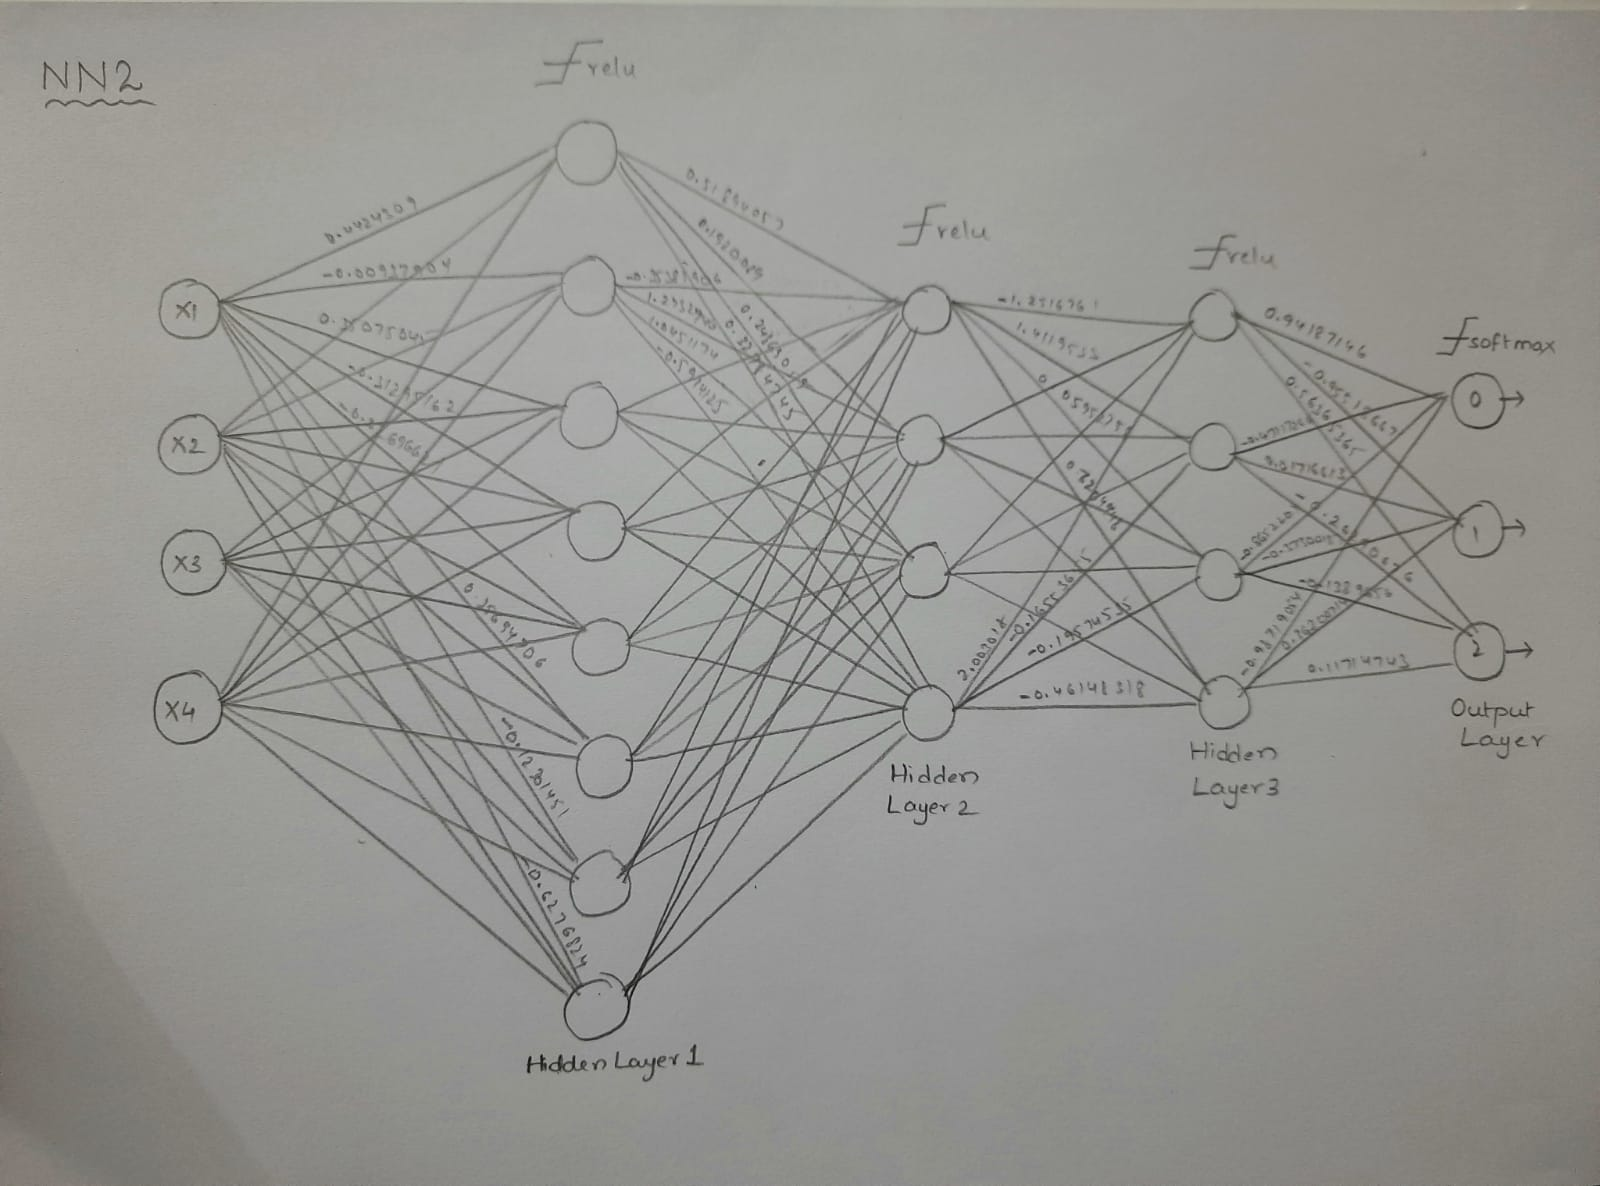

#### <span style='background : yellow' > **Conclusion:**</span>  Suitable activation functions: 
        'relu' activation function for the hidden layers & 'softmax' activation function for the output layer